In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/tmp/communications.csv')

# Display the first few rows of the dataframe
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/communications.csv'

In [ ]:
# Load the data
df = pd.read_csv('/app/noteable/f/3466fd47-8bea-473a-9364-101948442467/communications.csv')

# Display the first few rows of the dataframe
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/app/noteable/f/3466fd47-8bea-473a-9364-101948442467/communications.csv'

In [ ]:
# Load the data
df = pd.read_csv('communications.csv')

# Display the first few rows of the dataframe
df.head()

In [ ]:
# Check the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145941 entries, 0 to 145940
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   message_id        145941 non-null  object 
 1   customer_id       145941 non-null  object 
 2   sent_at           145941 non-null  object 
 3   clicked           145941 non-null  int64  
 4   converted         145941 non-null  int64  
 5   client_id         145941 non-null  object 
 6   gender            114265 non-null  object 
 7   customer_country  115795 non-null  object 
 8   age               123921 non-null  float64
 9   created_at        145941 non-null  object 
 10  client_name       145941 non-null  object 
 11  product_type      145941 non-null  object 
 12  client_country    145941 non-null  object 
 13  channel           145941 non-null  object 
 14  message_number    145941 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 16.7+ MB


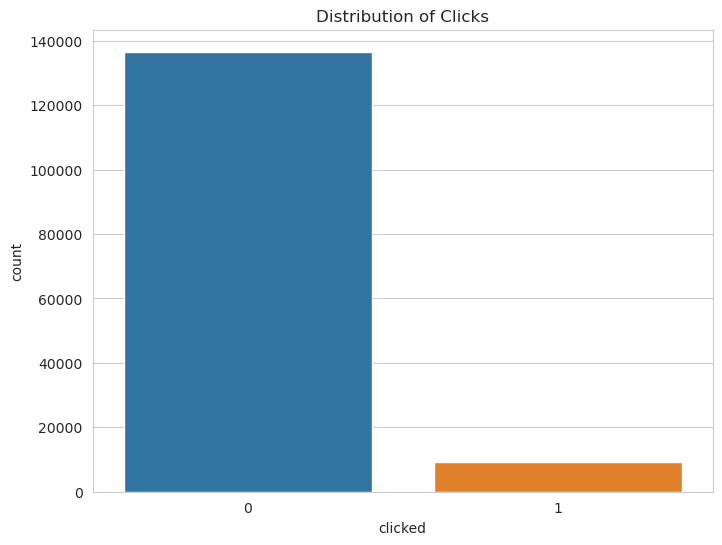

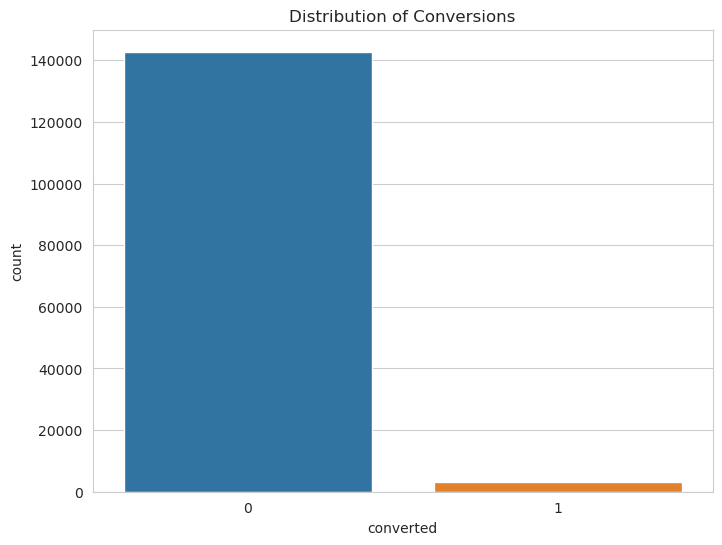

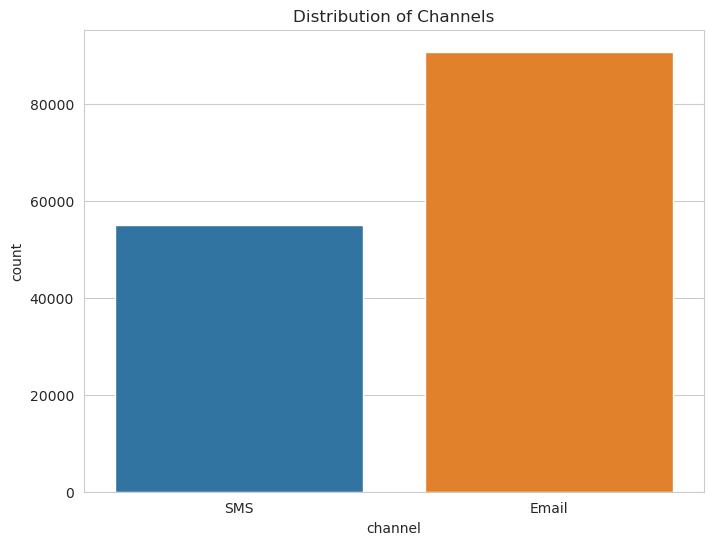

In [ ]:
# Set the style of all graphs to seaborn:
sns.set_style('whitegrid')

# Create a bar plot for 'clicked'
plt.figure(figsize=(8, 6))
sns.countplot(x='clicked', data=df)
plt.title('Distribution of Clicks')
plt.show()

# Create a bar plot for 'converted'
plt.figure(figsize=(8, 6))
sns.countplot(x='converted', data=df)
plt.title('Distribution of Conversions')
plt.show()

# Create a bar plot for 'channel'
plt.figure(figsize=(8, 6))
sns.countplot(x='channel', data=df)
plt.title('Distribution of Channels')
plt.show()

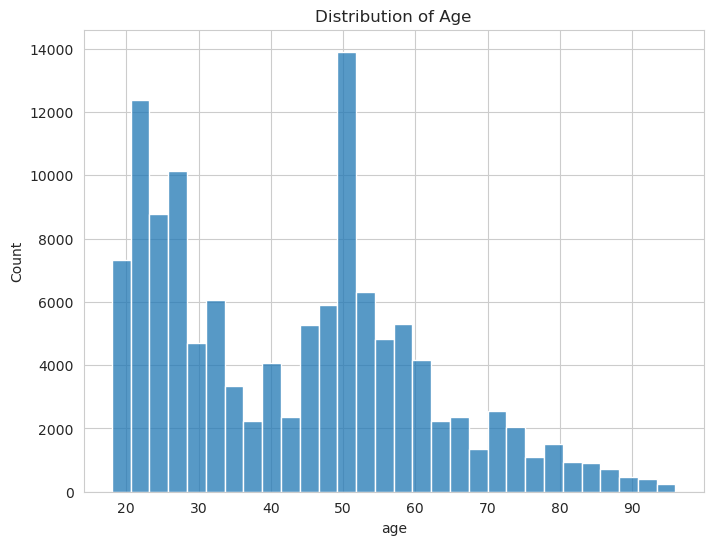

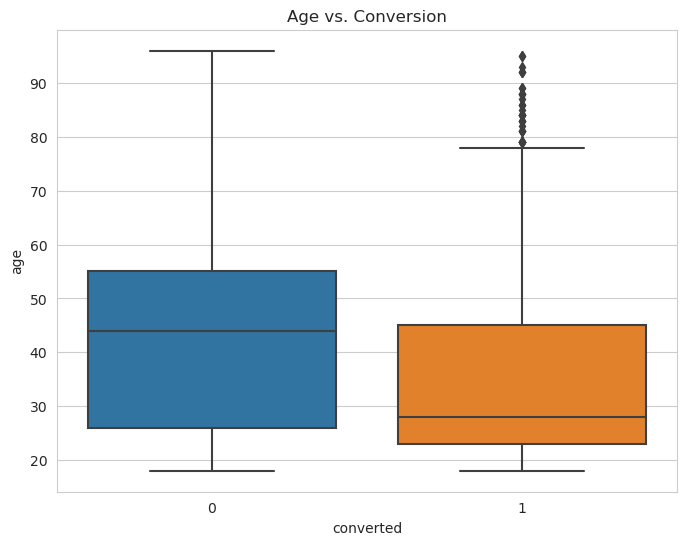

In [ ]:
# Create a histogram for 'age'
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=False)
plt.title('Distribution of Age')
plt.show()

# Create a boxplot for 'age' and 'converted'
plt.figure(figsize=(8, 6))
sns.boxplot(x='converted', y='age', data=df)
plt.title('Age vs. Conversion')
plt.show()

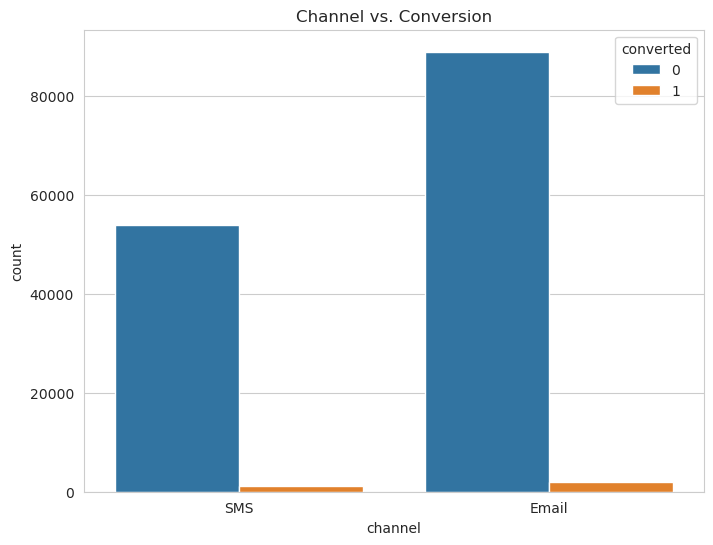

In [ ]:
# Create a countplot for 'channel' and 'converted'
plt.figure(figsize=(8, 6))
sns.countplot(x='channel', hue='converted', data=df)
plt.title('Channel vs. Conversion')
plt.show()

In [ ]:
# Calculate the percentage of missing values for 'age' and 'customer_country'
missing_age = df['age'].isnull().sum() / len(df) * 100
missing_country = df['customer_country'].isnull().sum() / len(df) * 100

missing_age, missing_country

(15.088289103130718, 20.656292611397756)

In [ ]:
# Use mean imputation for 'age'
df['age'].fillna(df['age'].mean(), inplace=True)

# Check the percentage of missing values for 'age' after imputation
missing_age = df['age'].isnull().sum() / len(df) * 100
missing_age

0.0

In [ ]:
# Fill missing values in 'customer_country' with 'Unknown'
df['customer_country'].fillna('Unknown', inplace=True)

# Check the percentage of missing values for 'customer_country' after filling
missing_country = df['customer_country'].isnull().sum() / len(df) * 100
missing_country

0.0

In [ ]:
# Convert 'sent_at' to datetime format
df['sent_at'] = pd.to_datetime(df['sent_at'])

# Extract the hour from 'sent_at'
df['sent_hour'] = df['sent_at'].dt.hour

# Group by 'customer_country' and 'sent_hour', and count the number of messages
message_counts = df.groupby(['customer_country', 'sent_hour']).size().reset_index(name='message_count')

# Display the first few rows of the result
message_counts.head()

In [ ]:
# Save the result to a CSV file
message_counts.to_csv('message_counts.csv', index=False)

In [ ]:
# Group by 'channel' and 'converted', and count the number of messages
channel_conversion = df.groupby(['channel', 'converted']).size().reset_index(name='message_count')

# Save the result to a CSV file
channel_conversion.to_csv('channel_conversion.csv', index=False)

In [ ]:
# Group by 'customer_country' and 'sent_hour', and count the number of messages where 'clicked' = 1
optimal_time_clicked = df[df['clicked'] == 1].groupby(['customer_country', 'sent_hour']).size().reset_index(name='message_count')

# Find the hour with the maximum count for each country
optimal_time_clicked = optimal_time_clicked.loc[optimal_time_clicked.groupby('customer_country')['message_count'].idxmax()]

# Save the result to a CSV file
optimal_time_clicked.to_csv('optimal_time_clicked.csv', index=False)

# Group by 'customer_country' and 'sent_hour', and count the number of messages where 'converted' = 1
optimal_time_converted = df[df['converted'] == 1].groupby(['customer_country', 'sent_hour']).size().reset_index(name='message_count')

# Find the hour with the maximum count for each country
optimal_time_converted = optimal_time_converted.loc[optimal_time_converted.groupby('customer_country')['message_count'].idxmax()]

# Save the result to a CSV file
optimal_time_converted.to_csv('optimal_time_converted.csv', index=False)